<a href="https://colab.research.google.com/github/raul-miranda/DS-201-Project-1/blob/main/Project_4_9_21_with_minmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **On the Problem of Predicting Whether a Data Science Candidate is Ready to Leave Their Job** 

Ana Ortez-Rivera, Olga Tolchinsky, Rongjia Zhang, Raul Miranda

Data Science 201 - Spring 2021  
Project 1   
April 6, 2021

## 1. Introduction

Human resource departments at companies and institutions face the usual challenge of sorting hundreds to thousands of applications to identify those candidates who are most likely to leave their present employment. Although a decision to leave depends strongly on the offer received, experience determines that candidates have various levels of predisposition based only on their current circumstances. Ranking candidates according to that predisposition allows HR departments to focus their resources on those candidates that are most likely to change jobs. 

To start exploring this problem, Team 4 selected a dataset from Kaggle titled "HR Analytics: Job Change of Data Scientists." https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists.


This dataset contains information about a large pool of potential candidates at a hypothetical company. That information includes their gender, relevant experience, education level, current company type and size, city index of development, years since been hired for the last job, etc., and the expressed desire to either leave their current position or likely to stay in it.

The purpose of our project is to do Exploratory Data Analysis to examine the database, and then determine what features appear as better determinant of the outcome for each candidate in the database: likely to leave or likely to stay.  Full statistical analysis to generate a model capable of predicting with high accuracy, precision and recall the binary outcome is outside the project scope at this stage. However, it implements a logistic regression model as an initial step.

The questions to investigate are:  
1) Which gender is most probable to leave their current job?  
2) What type of company will employees most likely leave?  
3) Does more training time lead to candidates more likely to leave their current job?  
4) Are people likely to change their jobs when they have experience that is more relevant to the position?  
5) Are they likely to leave when they have more years of experience?



The features of the data are as follows:

*   enrollee_id : Unique ID for candidate - categorical 
*   city: City code - discrete
*   city_development_index : Development index of the city (scaled) - continuous
*   gender: Gender of candidate - categorical
*   relevant_experience: Relevant experience of candidate - categorical
*   enrolled_university: Type of University course enrolled if any - categorical
*   education_level: Education level of candidate - categorical
*   major_discipline: Education major discipline of candidate - categorical
*   experience: Candidate total experience in years - discrete
*   company_size: No of employees in current employer's company - discrete
*   company_type : Type of current employer - categorical
*   last_new_job: Difference in years between previous job and current job - discrete
*   training_hours: training hours completed - continuous
*   target: 0 – Not looking for job change, 1 – Looking for a job change - binary

## 2. Data Ingestion & Wrangling

In [65]:
# Import all the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Download source files into google colab drive, from desktop; the alternative is to read directly from kaggle
from google.colab import files
target = files.upload()

Saving aug_test.csv to aug_test.csv
Saving aug_train.csv to aug_train.csv
Saving jobchange_test_target_values.npy to jobchange_test_target_values.npy


In [4]:
# Check: list files in google colab current directory
import os
from os import listdir

for f in os.listdir('.'):
  if os.path.isfile(f):
    print(f)

aug_train.csv
aug_test.csv
jobchange_test_target_values.npy


In [22]:
# Load the target data for the test set, provided as a numpy array
target =  np.load('jobchange_test_target_values.npy')

In [5]:
# Viewing the length 
len(target)

2129

In [23]:
# Load the test set, provided as a CSV file
testdata = pd.read_csv('aug_test.csv',sep=',')

In [7]:
# Viewing the length
len(testdata)

2129

In [24]:
# Correct typo in 'relevent'
testdata['relevent_experience'] = testdata['relevent_experience'].str.replace('relevent', 'relevant')
testdata.rename (inplace=True, columns={'relevent_experience':'relevant_experience'})

In [9]:
testdata[0:5]  # test data without the target column

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevant experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevant experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevant experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevant experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [10]:
target[:5]   #   target array

array([1., 0., 1., 0., 1.])

In [25]:
#  Append the column with targets to testdata 
testdata['target'] = target    

In [12]:
testdata[:5]  #  test data with the target column

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,32403,city_41,0.827,Male,Has relevant experience,Full time course,Graduate,STEM,9,<10,NaN,1,21,1.0
1,9858,city_103,0.920,Female,Has relevant experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98,0.0
2,31806,city_21,0.624,Male,No relevant experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15,1.0
3,27385,city_13,0.827,Male,Has relevant experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39,0.0
4,27724,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72,1.0


In [32]:
# Load the training set, provided as a CSV file
training = pd.read_csv('aug_train.csv',sep=',')

In [14]:
# Viewing the length
len(training)

19158

In [33]:
# Correct typo in 'relevent'
training['relevent_experience'] = training['relevent_experience'].str.replace('relevent', 'relevant')
training.rename (inplace=True, columns={'relevent_experience':'relevant_experience'})
training.head()

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevant experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [16]:
# Save the test set with target column included
testdata.to_csv ('aug_test1.csv', sep = ',')

In [34]:
# Checking to see how many null values
training.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevant_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [36]:
# Dropping all the nulls 
new_training = training.drop(['enrollee_id','city','major_discipline','gender','company_size','company_type'], axis=1)
new_training = new_training.dropna()

In [37]:
# Viewing new dataset
new_training.shape

(18014, 8)

In [38]:
# Checking that there are no more nulls
new_training.isnull().sum()

city_development_index    0
relevant_experience       0
enrolled_university       0
education_level           0
experience                0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [39]:
# Viewing head of new data
new_training.head()

,city_development_index,relevant_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target
0,0.920,Has relevant experience,no_enrollment,Graduate,>20,1,36,1.0
1,0.776,No relevant experience,no_enrollment,Graduate,15,>4,47,0.0
2,0.624,No relevant experience,Full time course,Graduate,5,never,83,0.0
4,0.767,Has relevant experience,no_enrollment,Masters,>20,4,8,0.0
5,0.764,Has relevant experience,Part time course,Graduate,11,1,24,1.0


## 3. Exploratory Data Analysis (EDA)

In [13]:
# Counting the target data, showing that it is imbalanced
new_training.value_counts('target')

target
0.0    13593
1.0     4421
dtype: int64

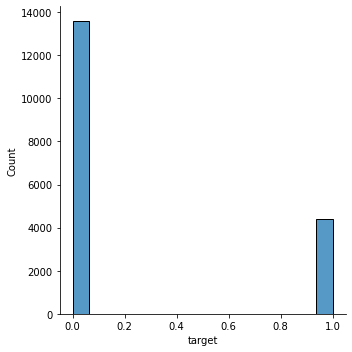

In [14]:
# Plotting the amount of target data, showing that it is imbalanced
sns.displot(new_training['target'])
plt.show()

In [15]:
# Graph of the number of genders reported in dataset
sns.set_theme(style="darkgrid")
sns.displot(new_training['gender'])
plt.xlabel('Reported Genders')
plt.ylabel('Count')
plt.title('Reported Genders')
plt.show()

KeyError: ignored

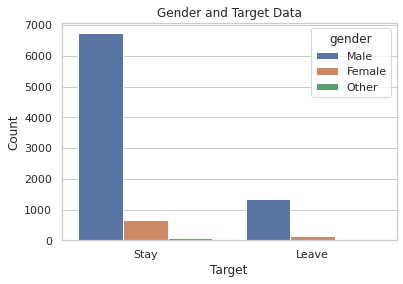

In [25]:
# Bargraph of the number of people who are willing to leave/stay based on gender
sns.set_theme(style="whitegrid")
sns.countplot(x='target',hue='gender',data=new_training)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Gender and Target Data')
plt.xticks([0.0, 1.0], ['Stay', 'Leave'])
plt.show()

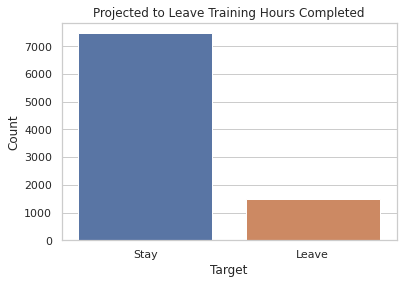

In [26]:
# Bargraph of the number of people who are willing to leave/stay in dataset
sns.countplot(x='target', data = new_training)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Projected to Leave Training Hours Completed')
plt.xticks([0.0, 1.0], ['Stay', 'Leave'])
plt.show()

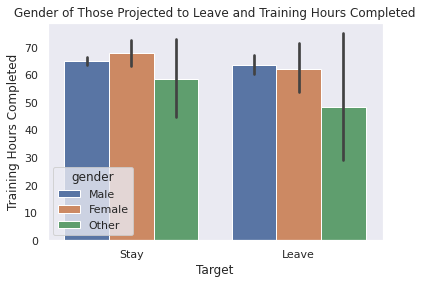

In [27]:
# Barplot of the genders of people who are willing to leave/stay and the training hours completed
sns.set_theme(style="dark")
sns.barplot(x="target", y="training_hours", hue="gender", data=new_training)
plt.xticks([0.0, 1.0], ['Stay', 'Leave'])
plt.xlabel('Target')
plt.ylabel('Training Hours Completed')
plt.title('Gender of Those Projected to Leave and Training Hours Completed')
plt.show()

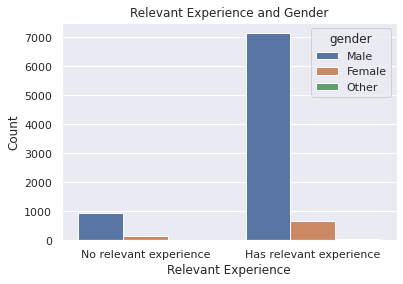

In [28]:
# Bargraph counting those with relevant experience based on gender
sns.set_theme(style="darkgrid")
sns.countplot(x='relevant_experience', hue = 'gender',data=new_training)
plt.xlabel('Relevant Experience')
plt.ylabel('Count')
plt.title('Relevant Experience and Gender')
plt.show()

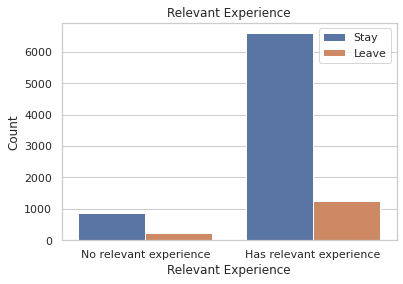

In [29]:
# Bargraph counting those who have relevent experience based on likelihood of leaving/staying
sns.set_theme(style="whitegrid")
sns.countplot(x ='relevant_experience', hue ='target',data=new_training)
plt.xlabel('Relevant Experience')
plt.ylabel('Count')
plt.title('Relevant Experience')
plt.legend(('Stay','Leave'))
plt.show()

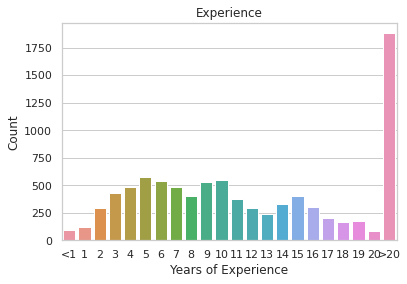

In [30]:
# Graph on how many different years of experiences employeees have
experience_order = ['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']
sns.countplot(x='experience',data=new_training, order=experience_order)
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.title('Experience')
plt.show()


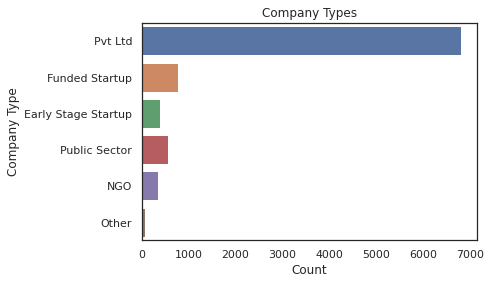

In [31]:
# Bargraph counting the types of companies in dataset
sns.set_theme(style="white")
sns.countplot(y='company_type',data=new_training)
plt.xlabel('Count')
plt.ylabel('Company Type')
plt.title('Company Types')
plt.show()

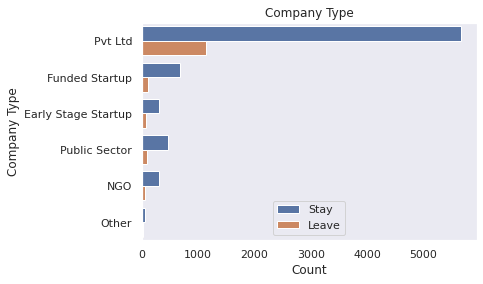

In [32]:
# Graph counting the types of companies and how many employees are/are not willing to leave
sns.set_theme(style="dark")
sns.countplot(y='company_type',hue= 'target', data=new_training)
plt.legend(('Stay','Leave'), loc='lower center')
plt.xlabel('Count')
plt.ylabel('Company Type')
plt.title('Company Type')
plt.show()

## 4. Simulate a nonparametric inference of the Median for a quantitative variable


4a. Bootstrapping


Median of the original training set:  47.0

Bootstrap median (red line):  47.0

95% Confidence interval (yellow lines): [44. 50.] 




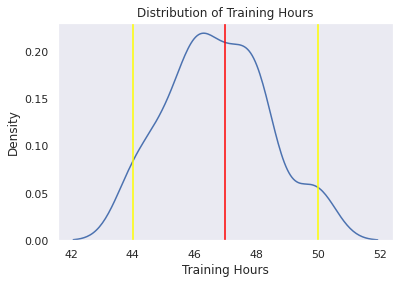

In [80]:
# (bootstrapping inference of median of 'training_hours' array)
print ("\nMedian of the original training set: ", training['training_hours'].median())   #  original sample median

boot = np.random.choice(training['training_hours'], 1000)
median_boot_samples = []
for i in range (100):
  boot_sample = np.random.choice(boot, 1000)
  median_boot_samples.append(np.median(boot_sample))

bootstrap_median = np.median(median_boot_samples)
print ("\nBootstrap median (red line): ", bootstrap_median)        # compare bootstrap median with original

conf_int = np.percentile(median_boot_samples, [2.5, 97.5])     #confidence interval, central 95%
print ("\n95% Confidence interval (yellow lines):", conf_int,'\n\n')

sns.kdeplot (median_boot_samples)      # plot the distribution, indicate median, conf. int.
plt.axvline (bootstrap_median, color = 'red')
plt.xlabel('Training Hours')
plt.ylabel('Density')
plt.title('Distribution of Training Hours')
for ends in conf_int:
  plt.axvline (ends, color = 'yellow')
plt.show()


In [79]:
## implement bootstrapping to infer the median of 'training_hours', using sklearn resample
from sklearn.utils import resample

print ("\nMedian of the original training set: ", training['training_hours'].median())   #  original sample median

median_boot_samples = []

for i in range (100):
  boot_sample = resample(boot, replace=True, random_state=1)
  median_boot_samples.append (np.median(boot_sample))

bootstrap_median = np.median(median_boot_samples)
print ("\nBootstrap median (red line): ", bootstrap_median)        # compare bootstrap median with original


Median of the original training set:  47.0

Bootstrap median (red line):  50.0


## 5. Calculating probabilites

In [35]:
# Calculate probability of leaving for each category,  defined as P = Leave/(Leave+Stay)

In [36]:
counts = new_training.groupby(['gender','target']).size().reset_index(name='counts')
counts

,gender,target,counts
0,Female,0.0,673
1,Female,1.0,131
2,Male,0.0,6733
3,Male,1.0,1340
4,Other,0.0,66
5,Other,1.0,12


In [37]:
Pfem = counts.loc[1,'counts'] / (counts.loc[0,'counts'] + counts.loc[1,'counts'])
Pmal = counts.loc[3,'counts'] / (counts.loc[2,'counts'] + counts.loc[3,'counts'])
Poth = counts.loc[5,'counts'] / (counts.loc[4,'counts'] + counts.loc[5,'counts'])
print ('\nProbabilities\nFemales: ', Pfem, '\nMales: ', Pmal,'\nOther: ', Poth)


Probabilities
Females:  0.16293532338308458 
Males:  0.16598538337668772 
Other:  0.15384615384615385


In [38]:
counts = new_training.groupby(['education_level','target']).size().reset_index(name='counts')
counts

,education_level,target,counts
0,Graduate,0.0,5160
1,Graduate,1.0,1092
2,Masters,0.0,2092
3,Masters,1.0,357
4,Phd,0.0,220
5,Phd,1.0,34


In [39]:
Pgra = counts.loc[1,'counts'] / (counts.loc[0,'counts'] + counts.loc[1,'counts'])
Pmst = counts.loc[3,'counts'] / (counts.loc[2,'counts'] + counts.loc[3,'counts'])
Pphd = counts.loc[5,'counts'] / (counts.loc[4,'counts'] + counts.loc[5,'counts'])
print ('\nProbabilities\nGraduates: ', Pgra,'\nMasters: ', Pmst,'\nPhDs: ', Pphd)


Probabilities
Graduates:  0.1746641074856046 
Masters:  0.14577378521845652 
PhDs:  0.13385826771653545


In [40]:
# Probabilities for subcategories:   gender in each education_level

counts = new_training.groupby(['education_level','gender','target']).size().reset_index(name='counts')
counts

,education_level,gender,target,counts
0,Graduate,Female,0.0,441
1,Graduate,Female,1.0,85
2,Graduate,Male,0.0,4669
3,Graduate,Male,1.0,995
4,Graduate,Other,0.0,50
5,Graduate,Other,1.0,12
6,Masters,Female,0.0,194
7,Masters,Female,1.0,42
8,Masters,Male,0.0,1882
9,Masters,Male,1.0,315


In [41]:
Pgraf = counts.loc[1,'counts'] / (counts.loc[0,'counts'] + counts.loc[1,'counts'])
Pmstf = counts.loc[7,'counts'] / (counts.loc[6,'counts'] + counts.loc[3,'counts'])
Pphdf = counts.loc[12,'counts'] / (counts.loc[11,'counts'] + counts.loc[5,'counts'])
Pgram = counts.loc[3,'counts'] / (counts.loc[2,'counts'] + counts.loc[1,'counts'])
Pmstm = counts.loc[9,'counts'] / (counts.loc[8,'counts'] + counts.loc[3,'counts'])
Pphdm = counts.loc[14,'counts'] / (counts.loc[13,'counts'] + counts.loc[5,'counts'])
Pgrao = counts.loc[5,'counts'] / (counts.loc[4,'counts'] + counts.loc[1,'counts'])
Pmsto = 0. / (counts.loc[2,'counts'] + counts.loc[3,'counts'])
Pphdo = 0. / (counts.loc[4,'counts'] + counts.loc[5,'counts'])
print ('Probabilities\nFemale graduates: ', Pgraf,'\nFemale masters:', Pmstf,'\nFemale PhDs:', Pphdf)
print ('\nMale graduates: ', Pgram,'\nMale masters:', Pmstm,'\nMale PhDs:', Pphdm)
print ('\nOther graduates: ', Pgrao,'\nOther masters:' ,Pmsto,'\nOther PhDs:', Pphdo)

Probabilities
Female graduates:  0.16159695817490494 
Female masters: 0.03532380151387721 
Female PhDs: 0.08

Male graduates:  0.20929743374000842 
Male masters: 0.10948905109489052 
Male PhDs: 0.15463917525773196

Other graduates:  0.08888888888888889 
Other masters: 0.0 
Other PhDs: 0.0


In [42]:
# Looking at other categorical variables: major_discipline and the average target (1: likely to leave)
new_training.drop('enrollee_id', axis=1).groupby('major_discipline').mean()

,city_development_index,training_hours,target
major_discipline,,,
Arts,0.907961,56.224806,0.069767
Business Degree,0.878659,70.482353,0.123529
Humanities,0.900392,66.124339,0.105820
No Major,0.863777,59.687500,0.133929
Other,0.860650,61.728814,0.107345
STEM,0.839554,65.202779,0.172612


In [43]:
# Looking at other categorical variables: company_type and the average target
new_training.drop('enrollee_id', axis=1).groupby('company_type').mean()

,city_development_index,training_hours,target
company_type,,,
Early Stage Startup,0.807151,69.441558,0.202597
Funded Startup,0.853381,67.178571,0.137755
NGO,0.856022,63.117978,0.154494
Other,0.870667,69.305556,0.208333
Public Sector,0.871012,59.132979,0.166667
Pvt Ltd,0.842602,65.135708,0.166765


In [44]:
# Looking at other categorical variables: relevant_experience and the average target
new_training.drop('enrollee_id', axis=1).groupby('relevant_experience').mean()

,city_development_index,training_hours,target
relevant_experience,,,
Has relevant experience,0.844350,65.472042,0.160489
No relevant experience,0.846132,62.250906,0.201993


In [16]:
# Plotting the years of experience against average target

dftemp = new_training.drop('enrollee_id', axis=1).groupby('experience', as_index=False)['target'].mean()
dftemp.loc[dftemp.experience == '>20', 'experience'] = 25
dftemp.loc[dftemp.experience == '<1', 'experience'] = 0.5
dftemp.experience = pd.to_numeric(dftemp.experience)
dftemp

,experience,target
0,1.0,0.421053
1,10.0,0.213531
2,11.0,0.228043
3,12.0,0.178947
4,13.0,0.188630
5,14.0,0.177504
6,15.0,0.166168
7,16.0,0.133197
8,17.0,0.169184
9,18.0,0.142857


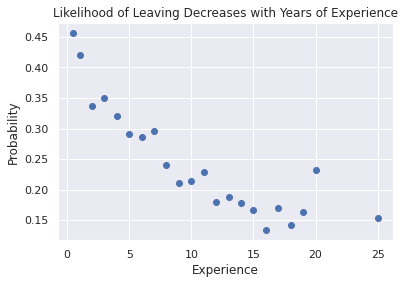

In [17]:
x, y = dftemp.experience, dftemp.target
plt.scatter(x, y, marker='o') ;
plt.xlabel('Experience')
plt.ylabel('Probability')
plt.title ('Likelihood of Leaving Decreases with Years of Experience')
plt.show()


In [47]:
# Getting basic statistics on city development index
new_training['city_development_index'].describe()

count    8955.000000
mean        0.844570
std         0.116178
min         0.448000
25%         0.794000
50%         0.910000
75%         0.920000
max         0.949000
Name: city_development_index, dtype: float64

In [48]:
# Binning the city_development_index to create 'City_class" and examine average target for each class
bins = [0.4,.82,.919,.92,.96]
labels = ['.40-.82', '.821-.91','.911-.930','.931-.960']
new_training['City_class'] = pd.cut(new_training.city_development_index, bins, labels=labels)

new_training.drop('enrollee_id', axis=1).groupby('City_class', as_index=False).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,City_class,city_development_index,training_hours,target
0,.40-.82,0.670677,65.545822,0.376665
1,.821-.91,0.891245,63.705711,0.076282
2,.911-.930,0.920000,65.775380,0.094093
3,.931-.960,0.928850,65.185304,0.080671


In [49]:
# Creating 'Training_hr' as bins of training hours to examine mean target for each class
new_training['experience'].describe()

count     8955
unique      22
top        >20
freq      1881
Name: experience, dtype: object

In [50]:
bins = [0,5,9,12,16,20]
labels = ['0-5', '5.1-9','9.1-12','12.1-16', '16.1-20']
new_training['Training_hr'] = pd.cut(new_training.training_hours, bins, labels=labels)

new_training.drop('enrollee_id', axis=1).groupby('Training_hr', as_index=False).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Training_hr,city_development_index,training_hours,target
0,0-5,0.833728,3.664000,0.192000
1,5.1-9,0.845561,7.493243,0.182432
2,9.1-12,0.844767,11.037433,0.171123
3,12.1-16,0.848122,14.547500,0.167500
4,16.1-20,0.848012,18.480249,0.149688


In [51]:
# Looking at company_type
new_training['company_type'].describe()

count        8955
unique          6
top       Pvt Ltd
freq         6794
Name: company_type, dtype: object

In [52]:
# Looking at years since 'last_new_job'
new_training['last_new_job'].describe()

count     8955
unique       6
top          1
freq      3838
Name: last_new_job, dtype: object

## 6. Modeling with scikit-learn LogisticRegression

In [40]:
# Clean original testdata and combine with original training data

testdata.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevant_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
target                      0
dtype: int64

In [42]:
new_testdata = testdata.drop(['enrollee_id','city','major_discipline','gender','company_size','company_type'], axis=1)
new_testdata = new_testdata.dropna()
new_testdata.isnull().sum()

city_development_index    0
relevant_experience       0
enrolled_university       0
education_level           0
experience                0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [43]:
new_testdata[:10]

,city_development_index,relevant_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target
0,0.827,Has relevant experience,Full time course,Graduate,9,1,21,1.0
1,0.920,Has relevant experience,no_enrollment,Graduate,5,1,98,0.0
2,0.624,No relevant experience,no_enrollment,High School,<1,never,15,1.0
3,0.827,Has relevant experience,no_enrollment,Masters,11,1,39,0.0
4,0.920,Has relevant experience,no_enrollment,Graduate,>20,>4,72,1.0
5,0.899,No relevant experience,Part time course,Masters,10,2,12,1.0
6,0.624,Has relevant experience,no_enrollment,Graduate,<1,1,11,0.0
7,0.920,Has relevant experience,no_enrollment,Graduate,>20,>4,81,1.0
8,0.878,Has relevant experience,no_enrollment,Graduate,14,4,2,0.0
9,0.624,Has relevant experience,Full time course,Graduate,3,1,4,1.0


In [45]:
# Combine training and testing sets originally given; drop vars not used as predictors

new_training2 = new_training.append(new_testdata)       # concat 2 datasets
#new_training2 = new_training.drop(['enrollee_id','City_class','Training_hr'], axis=1)   # drop enrollee_id, City_class, Training_hr
new_training2.head()

,city_development_index,relevant_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target
0,0.920,Has relevant experience,no_enrollment,Graduate,>20,1,36,1.0
1,0.776,No relevant experience,no_enrollment,Graduate,15,>4,47,0.0
2,0.624,No relevant experience,Full time course,Graduate,5,never,83,0.0
4,0.767,Has relevant experience,no_enrollment,Masters,>20,4,8,0.0
5,0.764,Has relevant experience,Part time course,Graduate,11,1,24,1.0


In [64]:
new_training2.shape

(20032, 8)

In [48]:
# Convert columns that contain mixed characters and numbers to numbers
#   so that these columns will now be numeric: 'experience','city','company_size','last_new_job'

new_training2.loc[new_training2.experience == '<1','experience'] = "0"   
new_training2.loc[new_training2.experience == '>20','experience'] = "25"   # numeric assignment of >20 to 25
#new_training2['city'] = new_training2['city'].str.replace('city_', '')        #convert city codes to numbers
#new_training2.loc[new_training2.company_size == '<10','company_size'] = "5"   # numeric assignment of <10 to 5
#new_training2.loc[new_training2.company_size == '10000+','company_size'] = "12000"   # numeric assignment of >10000 to 13000
#new_training2.loc[new_training2.company_size == '10/49','company_size'] = "30"   # numeric assignment of range to the average
#new_training2.loc[new_training2.company_size == '50-99','company_size'] = "75"   # numeric assignment of range to the average
#new_training2.loc[new_training2.company_size == '100-500','company_size'] = "300"   # numeric assignment of range to the average
#new_training2.loc[new_training2.company_size == '500-999','company_size'] = "750"   # numeric assignment of range to the average
#new_training2.loc[new_training2.company_size == '1000-4999','company_size'] = "3000"   # numeric assignment of range to the average
#new_training2.loc[new_training2.company_size == '5000-9999','company_size'] = "7500"  # numeric assignment of range to the average
new_training2.loc[new_training2.last_new_job == '>4','last_new_job'] = "5" # numeric assignment of >4 to 5
new_training2.loc[new_training2.last_new_job == 'never','last_new_job'] = "0" # numeric assignment of never to 0
#new_training2[['experience','city','company_size','last_new_job','training_hours']] = new_training2[['experience','city','company_size','last_new_job','training_hours']].apply(pd.to_numeric)
new_training2[['experience','last_new_job','training_hours']] = new_training2[['experience','last_new_job','training_hours']].apply(pd.to_numeric)
new_training2[:10]


,city_development_index,relevant_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target
0,0.920,Has relevant experience,no_enrollment,Graduate,25,1,36,1.0
1,0.776,No relevant experience,no_enrollment,Graduate,15,5,47,0.0
2,0.624,No relevant experience,Full time course,Graduate,5,0,83,0.0
4,0.767,Has relevant experience,no_enrollment,Masters,25,4,8,0.0
5,0.764,Has relevant experience,Part time course,Graduate,11,1,24,1.0
6,0.920,Has relevant experience,no_enrollment,High School,5,1,24,0.0
7,0.762,Has relevant experience,no_enrollment,Graduate,13,5,18,1.0
8,0.920,Has relevant experience,no_enrollment,Graduate,7,1,46,1.0
9,0.920,Has relevant experience,no_enrollment,Graduate,17,5,123,0.0
10,0.624,No relevant experience,Full time course,High School,2,0,32,1.0


In [59]:
#  Use pd.get_dummies to convert categorical variables to numeric

In [50]:
#new_training3 = pd.get_dummies(new_training2, columns=['gender','relevant_experience','enrolled_university','education_level','major_discipline','company_type'])
new_training3 = pd.get_dummies(new_training2, columns=['relevant_experience','enrolled_university','education_level'])
new_training3

,city_development_index,experience,last_new_job,training_hours,target,relevant_experience_Has relevant experience,relevant_experience_No relevant experience,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School
0,0.920,25,1,36,1.0,1,0,0,0,1,1,0,0,0,0
1,0.776,15,5,47,0.0,0,1,0,0,1,1,0,0,0,0
2,0.624,5,0,83,0.0,0,1,1,0,0,1,0,0,0,0
4,0.767,25,4,8,0.0,1,0,0,0,1,0,0,1,0,0
5,0.764,11,1,24,1.0,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,0.920,16,4,15,0.0,0,1,0,0,1,1,0,0,0,0
2125,0.897,18,2,30,1.0,1,0,0,0,1,0,0,1,0,0
2126,0.887,3,0,18,0.0,0,1,0,0,1,0,0,0,0,1
2127,0.804,7,1,84,0.0,1,0,1,0,0,0,1,0,0,0


In [72]:
y = new_training3['target']
X = new_training3.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
min_max = MinMaxScaler()
X_train_minmax = min_max.fit_transform(X_train)
X_test_minmax = min_max.transform(X_test)

In [61]:
#  We can use these lines to add columns of 0's for other educational levels that may exist in test data
#new_training3['education_level_High_School'] = 0
#new_training3['education_level_Primary_School'] = 0
#new_training3

In [51]:
#  Allocate the target variable to the y array and the predictor variables to the X array

y = new_training3['target']
X = new_training3.drop(['target'], axis=1)

#  Use  sklearn train_test_split to recreate the training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print ("X_train shape: ", X_train.shape)
print ("y_train shape: ", y_train.shape)
print ("X_test shape: ", X_test.shape)
print ("y_test shape: ", y_test.shape)
type(X_train)

X_train shape:  (16025, 14)
y_train shape:  (16025,)
X_test shape:  (4007, 14)
y_test shape:  (4007,)


pandas.core.frame.DataFrame

In [73]:
# Instantiate a  class of sklearn LogisticRegression 
model = LogisticRegression(max_iter=1000)
# Fit the model to the training data
model.fit(X_train_minmax, y_train)
# Use the model to predict the target of the test set, on the basis of the categorical variables in the test set
y_pred = pd.Series(model.predict(X_test_minmax))


In [74]:
# print some fitting results

print ('\nIntercept: ', model.intercept_)
print ('\nCoefficients: ', model.coef_, end='\n\n')


Intercept:  [0.78338184]

Coefficients:  [[-2.69771206 -0.32997808  0.15335024 -0.29821046 -0.34036542  0.34021396
   0.21732272 -0.08877171 -0.12870247  0.52416397 -0.22091253  0.31869612
  -0.08327684 -0.53882218]]





Confusion matrix:
 [[2829  174]
 [ 762  242]] 




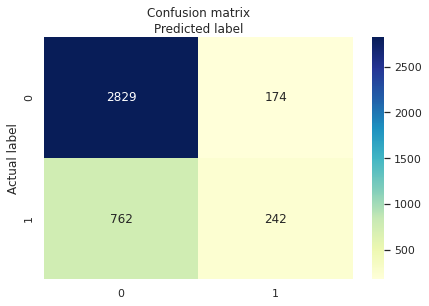

In [75]:
#  Calculate the confusion matrix using sklearn metrics.confusion_matrix method

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)     # confusion matrix calculation
print ('\n\nConfusion matrix:\n', cnf_matrix, '\n\n')
class_names=[0,1] # name  of classes

# graph the confusion matrix
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [76]:
# Calculate the Accuracy, Precision, Recall from the confusion matrix, using sklearn metrics methods

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))     # accuracy precision and recall calculation
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7664087846269029
Precision: 0.5817307692307693
Recall: 0.2410358565737052


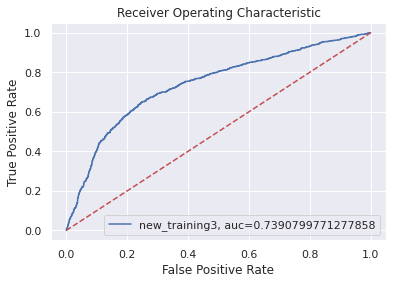

In [79]:
# Calculate and plot the ROC curve from the model predictions versus actual targets, using sklearn metrics methods
y_pred_proba = model.predict_proba(X_test_minmax)[::,1]             # predict probability
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)       # receiver operating characteristic curve
auc = metrics.roc_auc_score(y_test, y_pred_proba)            # true positive against false positive
# graph it
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,label="new_training3, auc="+str(auc))
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [68]:
# Show some of the predictions
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Predictions']
z.iloc[:10]

,True,Predictions
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,1.0
4,0.0,0.0
5,0.0,0.0
6,1.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [80]:
# Summary statistics
print (metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86      3003
         1.0       0.58      0.24      0.34      1004

    accuracy                           0.77      4007
   macro avg       0.68      0.59      0.60      4007
weighted avg       0.74      0.77      0.73      4007



In [70]:
#  Using SMOTE  (Synthetic Minority Oversampling Technique)
#   to  try to resolve the imbalanced target problem


In [58]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [82]:
smt = SMOTE (random_state=42, ratio='minority')
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train_minmax, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [83]:
# See the new shape

print ("X_train shape: ", X_train_SMOTE.shape)
print ("y_train shape: ", y_train_SMOTE.shape)
print ("X_test shape: ", X_test.shape)
print ("y_test shape: ", y_test.shape)
type(X_train_SMOTE)

X_train shape:  (24122, 14)
y_train shape:  (24122,)
X_test shape:  (4007, 14)
y_test shape:  (4007,)


numpy.ndarray


Intercept:  [1.82019999]

Coefficients:  [[-2.68775128 -0.19391212  0.21019152 -0.43630904 -0.36102688  0.36025713
   0.26356333 -0.10110291 -0.16323016  0.57982391 -0.2175799   0.33109367
  -0.05739682 -0.63671061]]



Confusion matrix:
 [[2175  828]
 [ 334  670]] 




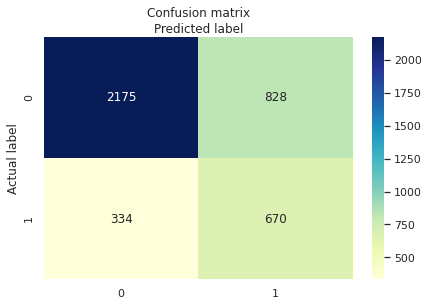



Accuracy: 0.7100074868979286
Precision: 0.4472630173564753
Recall: 0.6673306772908366


               precision    recall  f1-score   support

         0.0       0.87      0.72      0.79      3003
         1.0       0.45      0.67      0.54      1004

    accuracy                           0.71      4007
   macro avg       0.66      0.70      0.66      4007
weighted avg       0.76      0.71      0.73      4007
 




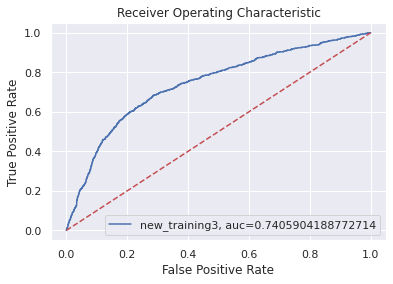

In [86]:
# Repeat the Logistic Regression and Prediction with the SMOTEd datasets

# Instantiate a  class of sklearn LogisticRegression 
model = LogisticRegression(max_iter=1000)
# Fit the model to the training data
model.fit(X_train_SMOTE, y_train_SMOTE)
# Use the model to predict the target of the test set, on the basis of the categorical variables in the test set
y_pred = pd.Series(model.predict(X_test_minmax))

# print some fitting results

print ('\nIntercept: ', model.intercept_)
print ('\nCoefficients: ', model.coef_, end='\n\n')

#  Calculate the confusion matrix using sklearn metrics.confusion_matrix method

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)     # confusion matrix calculation
print ('\n\nConfusion matrix:\n', cnf_matrix, '\n\n')
class_names=[0,1] # name  of classes

# graph the confusion matrix
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Calculate the Accuracy, Precision, Recall from the confusion matrix, using sklearn metrics methods

print("\n\nAccuracy:",metrics.accuracy_score(y_test, y_pred))     # accuracy precision and recall calculation
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print ('\n\n', metrics.classification_report(y_test, y_pred), '\n\n')

# Calculate and plot the ROC curve from the model predictions versus actual targets, using sklearn metrics methods
y_pred_proba = model.predict_proba(X_test_minmax)[::,1]             # predict probability
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)       # receiver operating characteristic curve
auc = metrics.roc_auc_score(y_test, y_pred_proba)            # true positive against false positive
# graph it
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,label="new_training3, auc="+str(auc))
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## 5. Conclusions


This project has shown that predicting the intention to leave employment on the basis of a partial set of variables is not straightforward. It would have been important to include more information on the current job and the prospective job. For example, level of both positions, salary, and the like. 

**The goal of our project was to answer the following questions:**

1) Which **gender** is most probable to leave their current job?
> The data shows that both males and females are as likely to leave or stay. Those that are in the "other" gender category are less likely to leave.

> Due to an imbalanced data on genders, our intitial EDA is skewed. Therefore, the conclusions that are made are biased. However, more tend to leave rather than stay for both these genders. There is small data size of the "other" genders.

> Within the gender groups, more females are more likely to stay. 

2) What **type of company** will employees most likely leave?
> Employees of private, public sector, and NGOs companies are less likely to leave. Out of all, those in founded start-ups are the least likely to leave. 

> Those in early stage and other are more likely to leave. 

> We can assume that those in early stage start ups have less job securitiy, in which a lot of start ups fail in their first years.

> Additionally, half of the companies in the data are private companies. This is another way that our data is imbalanced. The ratio of leave:stay is large for the private.


3) Does more **training time** lead to candidates more likely to leave their current job?
> Those that have more training hours are more likely to stay rather than to leave. 

> Training hours have some influence, but  are not a major factor in explaining the probability of leaving.

> We can assume that it is because those who are more trained feel security and oppportunties for growth within their companies. Having training opportunties shows that companies are willing to invest in their employees. Employees may feel less "stuck" or "stagnant" in their current jobs.

> Also, using the bootstrap mehtod we were able to get the same median and the python statistic mean for training hours.

4) Are people likely to change their jobs when they have **experience that is more relevant** to the position?

> The data shows that those who have more relevant experience are more likely to stay rather than leave. 

> We could assume that those who have less experience are looking for new more favorable oppportunities in other companies. These people may have lower expectations, or picky, of the new job. There are also less job opportunties for mid-level or late-career job seekers. There are more job options for early-career employees in the market.

> The data is also imblanced, in which we have more people that have relevant experience than those who do not. 

> We do not have information about the position they currently have versus the position that they are applyting to. We can assume that their current position is a better than the offers that are in the market.

> Also, the smooth curve of probability of staying in the position shows the constant decrease with respect of years of experience. 

5) Are they likely to leave when they have more **years of experience**?
> Those that have more relevant experience are less likely to leave. 

> What is missing in the data is more information on the current job positions. It would be great to see the level of jobs and the salary. Not having this information makes it more difficult to understand incentives of why they choose to leave. Additionally, the data is slightly imbalanced because those that have 20 years of experiencs are over represented in the data. The plotted data of years of experience is not a normal distribution.

**Additional findings:**

Education level 
> Those that are "graduates" or those that have their Bachelors, are more likely to leave rather than stay.

> The higher the education, the more likely they are able to stay.
> We can assume that people with lower experience in education are more likely to take risks and change jobs into new opportunities. 

> Looking within gender groups, female are less likely to leave rather than stay in comparison to males. In the "other" category none are wiling to leave when they have Masters or PhD. Within the scope of this data, we can assume this can be explained in which females may have more responsibilities with children than males. They may be working mothers than need the stablity of their jobs and not willing to take larger risks. 

Major Disciplines
> STEM majors are more likely to leave than of the other majors. Those that have degrees in the Arts are less likely to leave. However, Art majors are underrepresented in the data, and STEM majors are overrepresented.

> We can assume that this is because those that are coming from the Art field could be having mid-career changes, and had to work hard to be able to get their current positions through additional training. They may feel satisfied having reached their current jobs and are less willing to leave. We can assume that those with STEM degress are more confident in changing jobs in the Tech field because they have a wider skills set through their degrees.

City Development Index
> By looking at city class, the probability of leaving is highest in the first 25th percentile of the city index (or lower developed areas.

> People are more willing to leave their jobs located in cities that have a lower city index. 

> In the data, most companies have higher city development indexes.

**Modeling with Logistic Regression:**
> In the confusion matrix, the recall is too low, but the precision is acceptable. The model overall is accurate when trained with the dataset provided, with an accuracy of 84.6%, precision of 51.7%, and recall of 23.6%. Technically this is not a reliable model.

>After applying the SMOTE procedure to generate more minority samples, the model trained with more data improved the recall (59.3%) as expected. However, it  decreased the accuracy (77.1%) and precision(35.9%), as expected.

>The model is not accurate enough to reliably predict the target, and should be improved. We would like over 95% accuracy.

>The required steps to improve the model are not a part of this project.

**Reflections on the data:**

Imbalanced data
> The imbalance of data is a major issue in our dataset because this causes inconsistencies in finding conclusions to our questions. For example, there is a imbalance in the amount of "target" and "gender" and therefore this could cause over estimation of "leaves" in our models.

> Ideally, we would want to have about equal representation in the various levels of variables, but we do not have such in the data. Other procedures besides SMOTE can be attempted in the future. Likewise, it is possible to explore other classification methods than logistic regression.

More information needed
> We would like to have more information that dives deeper into the dataset, such as "what is the current position and salary of the employees," and "what is the position and salary that they are leaving the companies for?" Another important factor needed would be the age of employees.



